In [ ]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
from utils.prepare_data import *

from sklearn import *
from pylab import *

from __future__ import print_function
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets


rounds = list(map(prepare_round,
             ['./data/players-score-round-1.bz2',
              './data/players-score-round-2.bz2',
              './data/players-score-round-3.bz2',
              './data/players-score-round-4.bz2',
              './data/players-score-round-5.bz2',
              './data/players-score-round-6.bz2',
              './data/players-score-round-7.bz2',
              './data/players-score-round-8.bz2']))

parameters, _ = get_valid_scouts(rounds[0])

parameters.extend(['points',
                   'team_position',
                   'status_code'])

In [89]:
%matplotlib notebook
def plot_point_hist(x):
    ax = rounds[x][rounds[x].status == 'likely'][["position", "points"]].boxplot(by="position", return_type='axes')
    plt.title(f"Round {x}")

interact(plot_point_hist, x=range(len(rounds)))

<function __main__.plot_point_hist>

#### Formações
    - 3-4-3 
    - 3-5-2 
    - 4-3-3 
    - 4-4-2 
    - 4-5-1 
    - 5-3-2 
    - 5-4-1

<IPython.core.display.Javascript object>


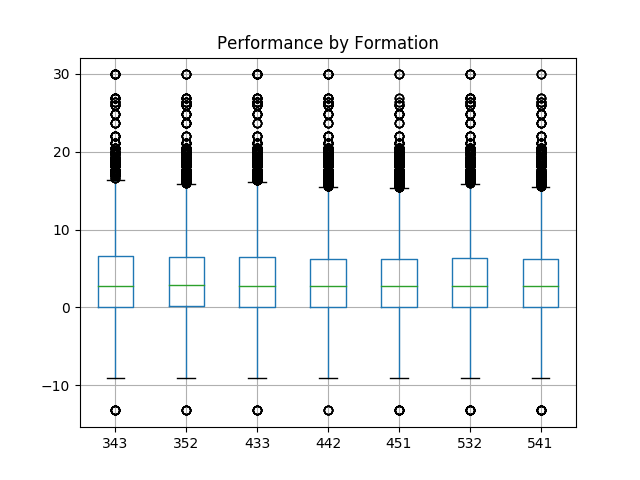

In [109]:
%matplotlib notebook
formations = {
    '343': {'goalkeeper': 1,  'fullback': 2, 'defender': 3, 'midfielder': 2, 'striker': 3},
    '352': {'goalkeeper': 1,  'fullback': 2, 'defender': 3, 'midfielder': 3, 'striker': 2},
    '433': {'goalkeeper': 1,  'fullback': 2, 'defender': 2, 'midfielder': 3, 'striker': 3},
    '442': {'goalkeeper': 1,  'fullback': 2, 'defender': 2, 'midfielder': 4, 'striker': 2},
    '451': {'goalkeeper': 1,  'fullback': 2, 'defender': 2, 'midfielder': 5, 'striker': 1},
    '532': {'goalkeeper': 1,  'fullback': 2, 'defender': 3, 'midfielder': 3, 'striker': 2},
    '541': {'goalkeeper': 1,  'fullback': 2, 'defender': 3, 'midfielder': 4, 'striker': 1}
}

def analyze_formation(sample_size=100):
    points = {}
    for formation_type in formations:
        formation = formations[formation_type]
        points[formation_type] = []
        for round in rounds:
            players = round[round.status == 'likely']    
            for _ in range(sample_size):
                for position, quantity in formation.items():
                    points[formation_type].extend(players[players.position == position].sample(quantity)['points'].tolist())            
    df = pd.DataFrame(points)
    ax = df.boxplot(return_type="axes")
    plt.title(f"Performance by Formation")
    return df

formation_data = analyze_formation(200)

In [110]:
formation_data.describe()

,343,352,433,442,451,532,541
count,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000,15400.000000
mean,3.828403,3.811727,3.836208,3.693039,3.640760,3.736104,3.631162
std,4.880580,4.773532,4.983147,4.863189,4.716581,4.783234,4.673616
min,-13.200000,-13.200000,-13.200000,-13.200000,-13.200000,-13.200000,-13.200000
25%,0.100000,0.200000,0.100000,0.000000,0.100000,0.100000,0.000000
50%,2.800000,2.900000,2.700000,2.700000,2.700000,2.800000,2.700000
75%,6.600000,6.500000,6.500000,6.200000,6.200000,6.400000,6.200000
max,29.900000,29.900000,29.900000,29.900000,29.900000,29.900000,29.900000


In [3]:
all_rounds = pd.concat(rounds, axis=0)

<IPython.core.display.Javascript object>


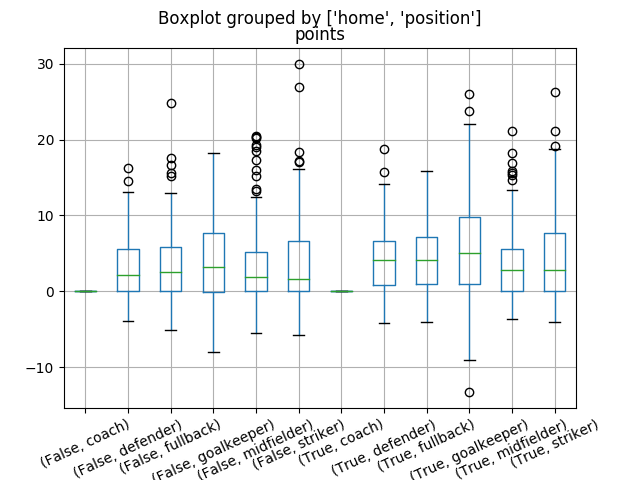

points                                                    
                  count      mean       std   min    25%   50%    75%   max
home  position                                                             
False coach        66.0  0.000000  0.000000   0.0  0.000  0.00  0.000   0.0
      defender    128.0  3.013281  3.815352  -3.9  0.075  2.10  5.525  16.3
      fullback    129.0  3.457364  4.706226  -5.1  0.000  2.50  5.900  24.8
      goalkeeper   68.0  3.654412  5.574367  -8.0 -0.075  3.25  7.700  18.2
      midfielder  246.0  3.013415  4.642477  -5.5  0.000  1.95  5.175  20.5
      striker     140.0  3.822143  5.779598  -5.8  0.000  1.60  6.675  29.9
True  coach        67.0  0.000000  0.000000   0.0  0.000  0.00  0.000   0.0
      defender    133.0  4.216541  3.877405  -4.2  0.900  4.10  6.700  18.8
      fullback    131.0  4.481679  4.253140  -4.0  1.000  4.20  7.150  15.8
      goalkeeper   68.0  5.364706  7.336105 -13.2  1.000  5.00  9.800  26.0
      midfielder  248.0  3.458468  4.136136  -3.7  0.100  2.80  5.625  21.1
      striker     146.0  4.580822  5.525419  -4.0  0.050  2.85  7.650  26.3

In [21]:
all_rounds[all_rounds.status == 'likely'][['home', 'position', 'points']].boxplot(by=['home', 'position'])
plt.xticks(rotation=25)
all_rounds[all_rounds.status == 'likely'][['home', 'position', 'points']].groupby(by=['home', 'position']).describe()